In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_folder_path = '/content/drive/My Drive/datasets/FashionDataset/'
dataset_folder_path = '/content/drive/My Drive/datasets/FashionDataset/'
train_names_path = '/content/drive/My Drive/datasets/FashionDataset/split/train.txt'
train_attr_path = '/content/drive/My Drive/datasets/FashionDataset/split/train_attr.txt'
val_names_path = '/content/drive/My Drive/datasets/FashionDataset/split/val.txt'
val_attr_path = '/content/drive/My Drive/datasets/FashionDataset/split/val_attr.txt'
test_names_path = '/content/drive/My Drive/datasets/FashionDataset/split/test.txt'

In [ ]:
pip install torch torchvision --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
!pip uninstall torchaudio torchtext
!pip install numpy --pre torch torchvision torchaudio --force-reinstall --index-url https://download.pytorch.org/whl/nightly/cu117
!pip list

Found existing installation: torchaudio 2.2.1+cu121
Uninstalling torchaudio-2.2.1+cu121:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/torchaudio-2.2.1+cu121.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torchaudio/*
    /usr/local/lib/python3.10/dist-packages/torio/*
Proceed (Y/n)? y
  Successfully uninstalled torchaudio-2.2.1+cu121
Found existing installation: torchtext 0.17.1
Uninstalling torchtext-0.17.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/torchtext-0.17.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torchtext/*
Proceed (Y/n)? y
  Successfully uninstalled torchtext-0.17.1
Looking in indexes: https://download.pytorch.org/whl/nightly/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 GB 1.1 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement torchvision (from versions: none)
ERROR: No matching distribution fo

In [ ]:
import os, gc
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ["PYTORCH_USE_CUDA_DSA"] = "1"

import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.memory_summary())
gc.collect()
torch.cuda.empty_cache()
print(torch.cuda.memory_summary())

2.2.2+cu121
12.1
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |
|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |
|---------------------------------------------------------------------------|
| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B

In [71]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from PIL import Image
import torch.nn.functional as F

class_names = [
    ['floral', 'graphic', 'striped', 'embroidered', 'pleated', 'solid', 'lattice'],  # Category 1: Patterns
    ['long_sleeve', 'short_sleeve', 'sleeveless'],  # Category 2: Sleeve Length
    ['maxi_length', 'mini_length', 'no_dress'],  # Category 3: Dress Length
    ['crew_neckline', 'v_neckline', 'square_neckline', 'no_neckline'],  # Category 4: Neckline
    ['denim', 'chiffon', 'cotton', 'leather', 'faux', 'knit'],  # Category 5: Material
    ['tight', 'loose', 'conventional'],  # Category 6: Fit
]

def one_hot_encode(labels, num_categories):
    return F.one_hot(labels.to(torch.int64), num_categories)

# dataset
class FashionDataset(Dataset):
    def __init__(self, image_folder_path, names_file, attr_file, transform=None):
        self.image_folder_path = image_folder_path
        self.names_file = names_file
        self.attr_file = attr_file
        self.transform = transform
        self.image_list = self.load_image_names()
        self.attr_labels = self.load_attributes()

    def __len__(self):
        return len(self.image_list)

    def load_image_names(self):
        with open(self.names_file, 'r') as f:
            image_list = [line.strip() for line in f.readlines()]
        return image_list

    def load_attributes(self):
        with open(self.attr_file, 'r') as f:
            # Assuming the attributes are already binary (0, 1)
            attr_labels = [list(map(int, line.strip().split())) for line in f.readlines()]
        return attr_labels

    def __getitem__(self, idx):
        img_name = self.image_list[idx]
        img_path = os.path.join(self.image_folder_path, img_name)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        attr_label = self.attr_labels[idx]
        attr_label = [one_hot_encode(torch.tensor(label), num_categories=len(names)).squeeze() for label, names in zip(attr_label, class_names)]

        # Pad the tensors to have the same size
        max_size = max(label.size(0) for label in attr_label)
        attr_label = [torch.nn.functional.pad(label, (0, max_size - label.size(0)), mode='constant', value=0) for label in attr_label]

        attr_label = torch.stack(attr_label)
        return image, attr_label

# preprocessing + augmentation
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = FashionDataset(image_folder_path, train_names_path, train_attr_path, transform=train_transform)
val_dataset = FashionDataset(image_folder_path, val_names_path, val_attr_path, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)


GPU: NVIDIA A100-SXM4-40GB


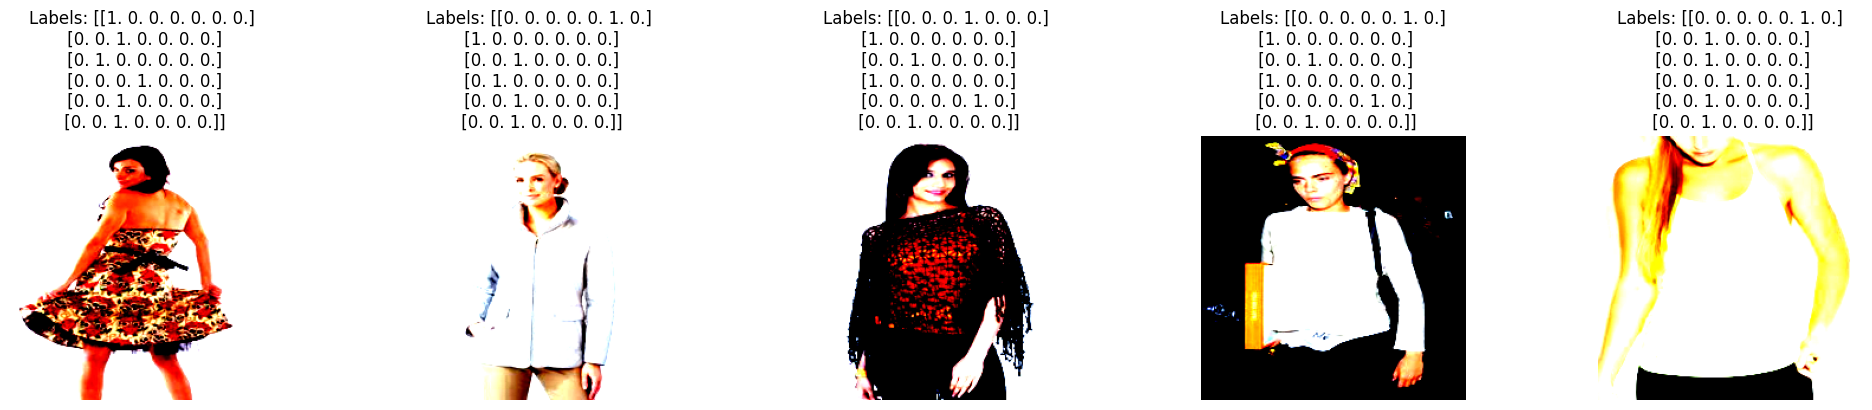

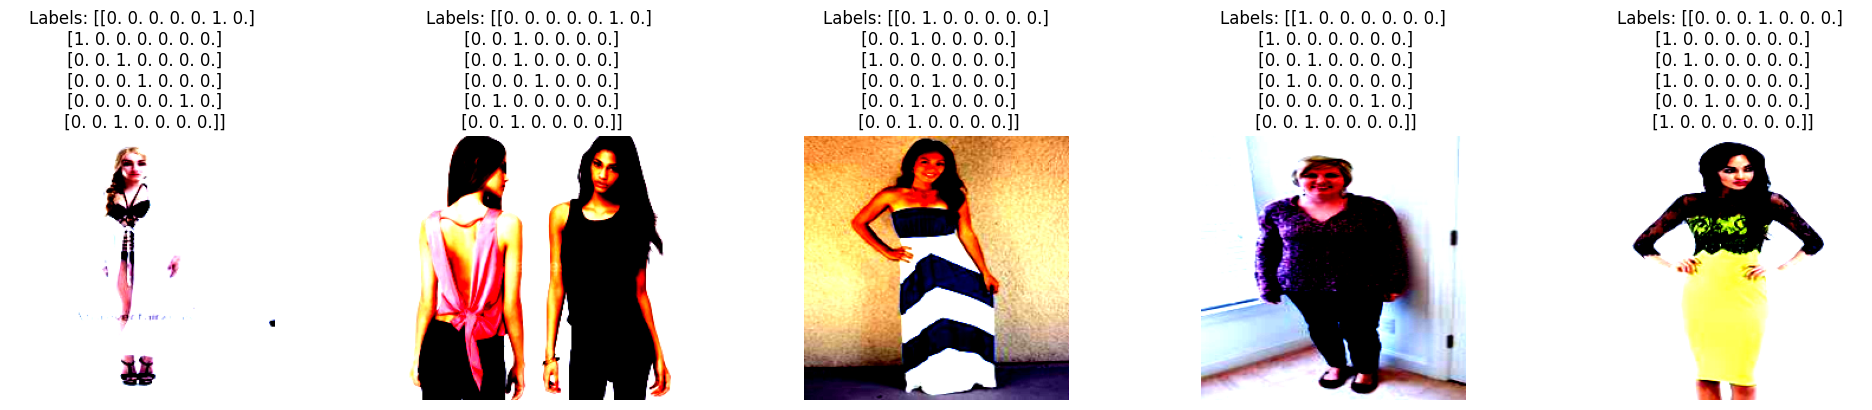

In [66]:
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = torch.device('cuda')
    print('GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
    print('No GPU available, using CPU.')

# labels and images corresponding
num_samples_to_visualize = 5

for images, labels in train_loader:
    images = images.to(device)
    labels = labels.float().to(device)

    fig, axes = plt.subplots(1, num_samples_to_visualize, figsize=(20, 4))

    for i in range(num_samples_to_visualize):
        image = images[i].cpu().permute(1, 2, 0).numpy()
        label = labels[i].cpu().numpy()

        axes[i].imshow(image)
        axes[i].set_title(f"Labels: {label}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    break  # only visualise first batch

for images, labels in val_loader:
    images = images.to(device)
    labels = labels.float().to(device)

    fig, axes = plt.subplots(1, num_samples_to_visualize, figsize=(20, 4))

    for i in range(num_samples_to_visualize):
        image = images[i].cpu().permute(1, 2, 0).numpy()
        label = labels[i].cpu().numpy()

        axes[i].imshow(image)
        axes[i].set_title(f"Labels: {label}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    break  # only visualise first batch


In [ ]:
# model
class FashionAttributeModel(nn.Module):
    def __init__(self, num_categories):
        super(FashionAttributeModel, self).__init__()
        # pre-trained DenseNet201 model
        self.base_model = models.densenet201(pretrained=True)

        # remove original classifier
        num_features = self.base_model.classifier.in_features

        # new classifier section
        # dense layers and batch normalization
        self.classifiers = nn.ModuleList()
        for n in num_categories:
            classifier = nn.Sequential(
                nn.Linear(num_features, 1024),
                nn.BatchNorm1d(1024),
                nn.ReLU(),
                nn.Dropout(0.5),
                nn.Linear(1024, 512),
                nn.BatchNorm1d(512),
                nn.ReLU(),
                nn.Dropout(0.5),
                nn.Linear(512, n)
            )
            self.classifiers.append(classifier)

    def forward(self, x):
        features = self.base_model.features(x)
        out = nn.functional.relu(features, inplace=True)
        out = nn.functional.adaptive_avg_pool2d(out, (1, 1))
        out = torch.flatten(out, 1)
        outputs = [classifier(out) for classifier in self.classifiers]
        return outputs

In [87]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms

# model, loss function, optimizer, and learning rate scheduler
num_categories = [len(names) for names in class_names]
model = FashionAttributeModel(num_categories).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.3, patience=3, verbose=True)

# early stopping variables
best_val_acc = 0
patience = 10
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.float().to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = 0
        for output, label, num_cats in zip(outputs, labels.transpose(0, 1), num_categories):
            loss += criterion(output, label[:, :num_cats])
        loss /= len(outputs)  # avg loss across all attributes -> acc going to be much higher than avg per category

        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # validation
    model.eval()
    val_loss = 0
    val_acc = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.float().to(device)

            outputs = model(images)

            batch_loss = 0
            batch_acc = 0
            for output, label, num_cats in zip(outputs, labels.transpose(0, 1), num_categories):
                batch_loss += criterion(output, label[:, :num_cats])
                batch_acc += ((output > 0.5) == label[:, :num_cats].bool()).float().mean()
            batch_loss /= len(outputs)  # Averaging the loss
            val_loss += batch_loss.item()
            val_acc += batch_acc.item() / len(outputs)

    val_loss /= len(val_loader)
    val_acc /= len(val_loader)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    scheduler.step(val_loss)

    # early stop check
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        patience_counter = 0
        torch.save(model.state_dict(), 'fashion_attribute_model_best.pth')
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print("Early stopping triggered.")
        break


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch [1/100], Train Loss: 0.4297, Val Loss: 0.3083, Val Acc: 0.8964
Epoch [2/100], Train Loss: 0.2457, Val Loss: 0.2428, Val Acc: 0.9117
Epoch [3/100], Train Loss: 0.1881, Val Loss: 0.2307, Val Acc: 0.9135
Epoch [4/100], Train Loss: 0.1457, Val Loss: 0.2272, Val Acc: 0.9147
Epoch [5/100], Train Loss: 0.1149, Val Loss: 0.2288, Val Acc: 0.9126
Epoch [6/100], Train Loss: 0.0893, Val Loss: 0.2362, Val Acc: 0.9124
Epoch [7/100], Train Loss: 0.0714, Val Loss: 0.2497, Val Acc: 0.9143
Epoch [8/100], Train Loss: 0.0607, Val Loss: 0.2544, Val Acc: 0.9109
Epoch [9/100], Train Loss: 0.0395, Val Loss: 0.2262, Val Acc: 0.9199
Epoch [10/100], Train Loss: 0.0296, Val Loss: 0.2297, Val Acc: 0.9224
Epoch [11/100], Train Loss: 0.0250, Val Loss: 0.2286, Val Acc: 0.9233
Epoch [12/100], Train Loss: 0.0216, Val Loss: 0.2325, Val Acc: 0.9221
Epoch [13/100], Train Loss: 0.0198, Val Loss: 0.2372, Val Acc: 0.9203
Epoch [14/100], Train Loss: 0.0172, Val Loss: 0.2376, Val Acc: 0.9217
Epoch [15/100], Train Loss: 0

KeyboardInterrupt: 

In [88]:
torch.save(model.state_dict(), 'fashion_attribute_model_3.pth')

In [93]:
class TestFashionDataset(Dataset):
    def __init__(self, image_folder_path, names_file, transform=None):
        self.image_folder_path = image_folder_path
        self.names_file = names_file
        self.transform = transform
        self.image_list = self.load_image_names()

    def __len__(self):
        return len(self.image_list)

    def load_image_names(self):
        with open(self.names_file, 'r') as f:
            image_list = [line.strip() for line in f.readlines()]
        return image_list

    def __getitem__(self, idx):
        img_name = self.image_list[idx]
        img_path = os.path.join(self.image_folder_path, img_name)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, img_name

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_dataset = TestFashionDataset(image_folder_path, test_names_path, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

model.eval()

predictions = []
for images, image_names in test_loader:
    images = images.to(device)
    with torch.no_grad():
        outputs = model(images)
        for output_per_image in zip(*outputs):
            category_indices = [output.argmax().item() for output in output_per_image]
            predictions.append(category_indices)

# assert len(predictions) == len(test_dataset), "Mismatch in predictions and dataset length"

with open('prediction.txt', 'w') as f:
    for image_name, pred in zip(test_dataset.image_list, predictions):
        pred_str = ' '.join(str(index) for index in pred)
        f.write(f"{pred_str}\n")


In [ ]:
model = torch.load(model.state_dict(), 'fashion_attribute_model_2.pth')

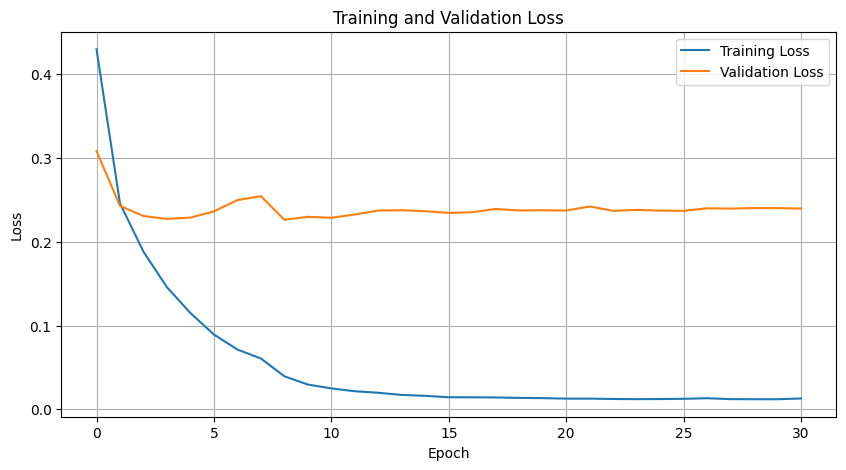

In [89]:
import matplotlib.pyplot as plt

data = """
Epoch [1/100], Train Loss: 0.4297, Val Loss: 0.3083, Val Acc: 0.8964
Epoch [2/100], Train Loss: 0.2457, Val Loss: 0.2428, Val Acc: 0.9117
Epoch [3/100], Train Loss: 0.1881, Val Loss: 0.2307, Val Acc: 0.9135
Epoch [4/100], Train Loss: 0.1457, Val Loss: 0.2272, Val Acc: 0.9147
Epoch [5/100], Train Loss: 0.1149, Val Loss: 0.2288, Val Acc: 0.9126
Epoch [6/100], Train Loss: 0.0893, Val Loss: 0.2362, Val Acc: 0.9124
Epoch [7/100], Train Loss: 0.0714, Val Loss: 0.2497, Val Acc: 0.9143
Epoch [8/100], Train Loss: 0.0607, Val Loss: 0.2544, Val Acc: 0.9109
Epoch [9/100], Train Loss: 0.0395, Val Loss: 0.2262, Val Acc: 0.9199
Epoch [10/100], Train Loss: 0.0296, Val Loss: 0.2297, Val Acc: 0.9224
Epoch [11/100], Train Loss: 0.0250, Val Loss: 0.2286, Val Acc: 0.9233
Epoch [12/100], Train Loss: 0.0216, Val Loss: 0.2325, Val Acc: 0.9221
Epoch [13/100], Train Loss: 0.0198, Val Loss: 0.2372, Val Acc: 0.9203
Epoch [14/100], Train Loss: 0.0172, Val Loss: 0.2376, Val Acc: 0.9217
Epoch [15/100], Train Loss: 0.0161, Val Loss: 0.2364, Val Acc: 0.9217
Epoch [16/100], Train Loss: 0.0145, Val Loss: 0.2344, Val Acc: 0.9235
Epoch [17/100], Train Loss: 0.0144, Val Loss: 0.2352, Val Acc: 0.9231
Epoch [18/100], Train Loss: 0.0142, Val Loss: 0.2391, Val Acc: 0.9216
Epoch [19/100], Train Loss: 0.0137, Val Loss: 0.2373, Val Acc: 0.9226
Epoch [20/100], Train Loss: 0.0134, Val Loss: 0.2376, Val Acc: 0.9235
Epoch [21/100], Train Loss: 0.0128, Val Loss: 0.2372, Val Acc: 0.9226
Epoch [22/100], Train Loss: 0.0128, Val Loss: 0.2421, Val Acc: 0.9205
Epoch [23/100], Train Loss: 0.0124, Val Loss: 0.2368, Val Acc: 0.9241
Epoch [24/100], Train Loss: 0.0122, Val Loss: 0.2380, Val Acc: 0.9221
Epoch [25/100], Train Loss: 0.0123, Val Loss: 0.2371, Val Acc: 0.9220
Epoch [26/100], Train Loss: 0.0126, Val Loss: 0.2369, Val Acc: 0.9235
Epoch [27/100], Train Loss: 0.0133, Val Loss: 0.2399, Val Acc: 0.9199
Epoch [28/100], Train Loss: 0.0122, Val Loss: 0.2395, Val Acc: 0.9218
Epoch [29/100], Train Loss: 0.0121, Val Loss: 0.2402, Val Acc: 0.9214
Epoch [30/100], Train Loss: 0.0121, Val Loss: 0.2401, Val Acc: 0.9220
Epoch [31/100], Train Loss: 0.0130, Val Loss: 0.2396, Val Acc: 0.9219
"""

lines = data.strip().split('\n')

train_losses = []
val_losses = []

for line in lines:
    parts = line.split(',')
    train_loss = float(parts[1].split(': ')[1])
    val_loss = float(parts[2].split(': ')[1])
    train_losses.append(train_loss)
    val_losses.append(val_loss)

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
